In [37]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Import requests and get the weather api key
import requests
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

#Use the citipy module to determine city based on lat & long
from citipy import citipy

#Import lingress
from scipy.stats import linregress

In [14]:
#Declare arrays to hold lats & long data
lats = []
lngs = []
lats_lngs = []

In [15]:
#Create a set of random lat and long combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs=zip(lats,lngs)

In [16]:
#Add the latitudes and longitudes to a list
coordinates=list(lats_lngs)

In [17]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

625

In [19]:
#Build the basic weather URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count +=1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | clyde river
Processing Record 3 of Set 1 | naze
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | vostok
Processing Record 8 of Set 1 | hasaki
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | byron bay
Processing Record 14 of Set 1 | san policarpo
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | ouricuri
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | floresta
Processing Record 20 of Set 1 | jasper
Processing Record 21 of Set 1 | encruzilhada do sul
Processing Record 22 of Set 1 | bac lieu
P

Processing Record 37 of Set 4 | garango
Processing Record 38 of Set 4 | portland
Processing Record 39 of Set 4 | ancud
Processing Record 40 of Set 4 | marang
Processing Record 41 of Set 4 | upernavik
Processing Record 42 of Set 4 | balsas
Processing Record 43 of Set 4 | verkhnyaya toyma
Processing Record 44 of Set 4 | namatanai
Processing Record 45 of Set 4 | nanortalik
Processing Record 46 of Set 4 | gamba
Processing Record 47 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 48 of Set 4 | muros
Processing Record 49 of Set 4 | mikuni
Processing Record 50 of Set 4 | port blair
Processing Record 1 of Set 5 | mount gambier
Processing Record 2 of Set 5 | gao
Processing Record 3 of Set 5 | nikolayevsk-na-amure
Processing Record 4 of Set 5 | novopokrovka
Processing Record 5 of Set 5 | kahului
Processing Record 6 of Set 5 | tual
Processing Record 7 of Set 5 | grand gaube
Processing Record 8 of Set 5 | roebourne
Processing Record 9 of Set 5 | karla
Processing Record 10 of S

Processing Record 28 of Set 8 | huaicheng
Processing Record 29 of Set 8 | olean
Processing Record 30 of Set 8 | cockburn town
Processing Record 31 of Set 8 | omsukchan
Processing Record 32 of Set 8 | kisangani
Processing Record 33 of Set 8 | miyako
Processing Record 34 of Set 8 | ullapool
Processing Record 35 of Set 8 | airai
Processing Record 36 of Set 8 | palmas
Processing Record 37 of Set 8 | flinders
Processing Record 38 of Set 8 | quebo
Processing Record 39 of Set 8 | caravelas
Processing Record 40 of Set 8 | kidal
Processing Record 41 of Set 8 | tecolutla
Processing Record 42 of Set 8 | neiafu
Processing Record 43 of Set 8 | mehamn
Processing Record 44 of Set 8 | cangzhou
Processing Record 45 of Set 8 | biak
Processing Record 46 of Set 8 | dunedin
Processing Record 47 of Set 8 | zhanatas
City not found. Skipping...
Processing Record 48 of Set 8 | turtas
Processing Record 49 of Set 8 | ixtapa
Processing Record 50 of Set 8 | lasa
Processing Record 1 of Set 9 | puerto baquerizo more

Processing Record 21 of Set 12 | melo
Processing Record 22 of Set 12 | pangkalanbuun
Processing Record 23 of Set 12 | te anau
Processing Record 24 of Set 12 | mecca
Processing Record 25 of Set 12 | farmington
Processing Record 26 of Set 12 | sibolga
Processing Record 27 of Set 12 | atar
Processing Record 28 of Set 12 | ahuimanu
Processing Record 29 of Set 12 | siverek
Processing Record 30 of Set 12 | beringovskiy
Processing Record 31 of Set 12 | codrington
Processing Record 32 of Set 12 | buqayq
City not found. Skipping...
Processing Record 33 of Set 12 | troitskoye
Processing Record 34 of Set 12 | yaan
Processing Record 35 of Set 12 | techiman
Processing Record 36 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 37 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 38 of Set 12 | renqiu
Processing Record 39 of Set 12 | illapel
Processing Record 40 of Set 12 | det udom
Processing Record 41 of Set 12 | high level
Processing Record 42 of Set 12 | sur
Pr

In [22]:
print(len(city_data))

582


In [23]:
#Convert the array of dictionaries (cities) to a pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,76.50,77,0,20.98,PF,2021-11-29 23:47:24
1,Clyde River,70.4692,-68.5914,-0.17,78,90,9.22,CA,2021-11-29 23:47:24
2,Naze,28.3667,129.4833,70.72,73,65,16.46,JP,2021-11-29 23:47:25
3,Vaini,-21.2000,-175.2000,84.36,70,20,9.22,TO,2021-11-29 23:47:25
4,Iqaluit,63.7506,-68.5145,11.93,79,90,17.27,CA,2021-11-29 23:47:25
5,Bethel,41.3712,-73.4140,37.49,73,75,1.01,US,2021-11-29 23:47:26
6,Vostok,46.4856,135.8833,15.01,82,100,1.92,RU,2021-11-29 23:47:26
7,Hasaki,35.7333,140.8333,39.60,62,22,8.66,JP,2021-11-29 23:47:26
8,Arraial Do Cabo,-22.9661,-42.0278,76.96,88,0,12.66,BR,2021-11-29 23:47:27
9,Nikolskoye,59.7035,30.7861,25.39,95,100,10.27,RU,2021-11-29 23:47:27


In [26]:
#Reorder the columns
new_column_order = ["City","Country","Date", "Lat","Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-11-29 23:47:24,-23.1203,-134.9692,76.50,77,0,20.98
1,Clyde River,CA,2021-11-29 23:47:24,70.4692,-68.5914,-0.17,78,90,9.22
2,Naze,JP,2021-11-29 23:47:25,28.3667,129.4833,70.72,73,65,16.46
3,Vaini,TO,2021-11-29 23:47:25,-21.2000,-175.2000,84.36,70,20,9.22
4,Iqaluit,CA,2021-11-29 23:47:25,63.7506,-68.5145,11.93,79,90,17.27
5,Bethel,US,2021-11-29 23:47:26,41.3712,-73.4140,37.49,73,75,1.01
6,Vostok,RU,2021-11-29 23:47:26,46.4856,135.8833,15.01,82,100,1.92
7,Hasaki,JP,2021-11-29 23:47:26,35.7333,140.8333,39.60,62,22,8.66
8,Arraial Do Cabo,BR,2021-11-29 23:47:27,-22.9661,-42.0278,76.96,88,0,12.66
9,Nikolskoye,RU,2021-11-29 23:47:27,59.7035,30.7861,25.39,95,100,10.27


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

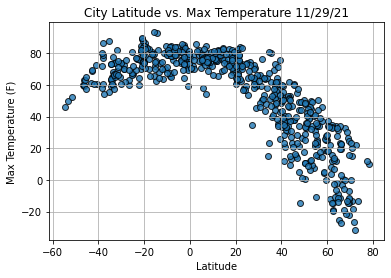

In [31]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

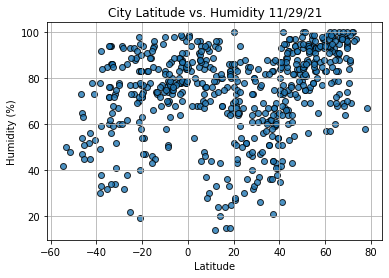

In [33]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

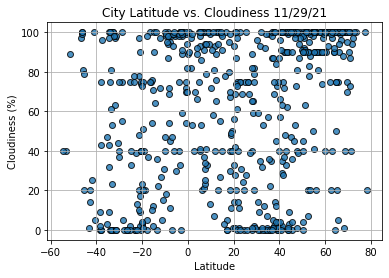

In [34]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

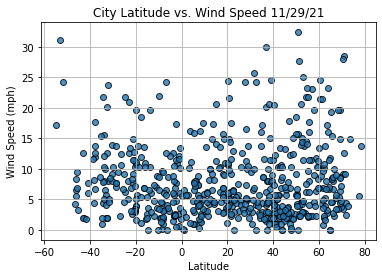

In [35]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.

In [56]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [57]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

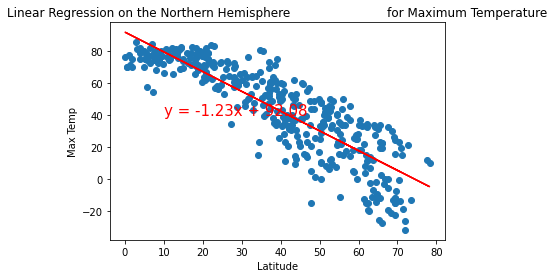

-0.86


In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(round(r_value,2))

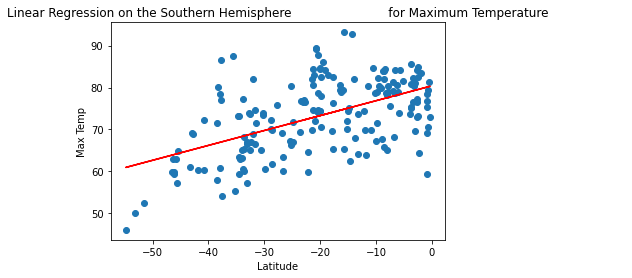

0.55


In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(round(r_value,2))

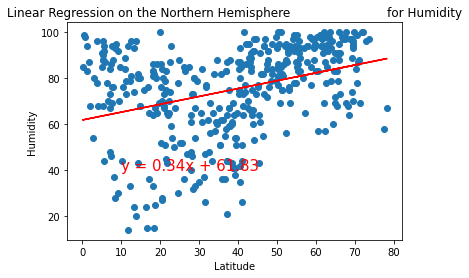

0.35


In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Humidity', 'Humidity',(10,40))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(round(r_value,2))

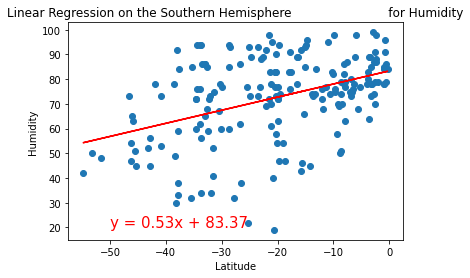

0.42


In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Humidity', 'Humidity',(-50,20))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(round(r_value,2))

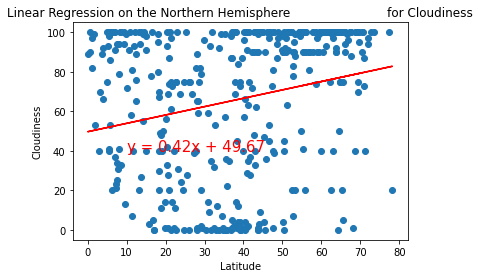

0.23


In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(10,40))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(round(r_value,2))

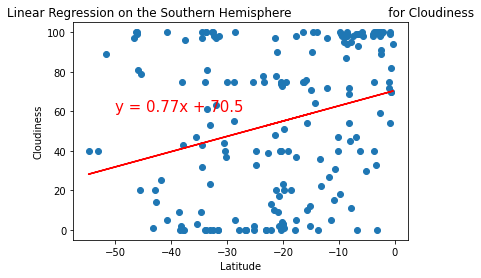

0.27


In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-50,60))
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(round(r_value,2))

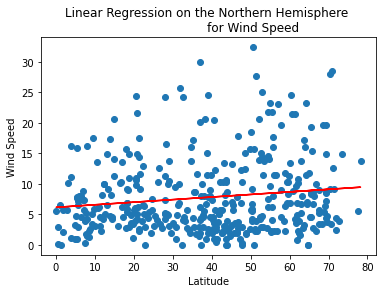

0.14


In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                       for Wind Speed', 'Wind Speed',(40,35))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(round(r_value,2))

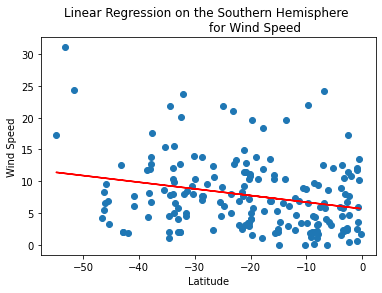

-0.25


In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(-50,35))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(round(r_value,2))